In [1]:
using Pkg
Pkg.add("DataFrames");
Pkg.add("CSV");

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]


In [1]:
using DataFrames
using Statistics
using CSV

ENV["COLUMNS"] = 120

120

In [15]:
include("../pricing/Pricing.jl")

Main.Pricing

In [4]:
df = DataFrame(CSV.read("data/spx_options_2017.csv"))

,underlying,underlying_last,optionroot,type,expiration,quotedate,strike,last,bid,ask,volume
,String,Float64,String,String,Dates…,Dates…,Float64,Float64,Float64,Float64,Int64
1,SPX,2257.83,SPX170120C00100000,call,2017-01-20,2017-01-03,100.0,2161.5,2154.3,2158.7,0
2,SPX,2257.83,SPX170120C00200000,call,2017-01-20,2017-01-03,200.0,2060.95,2054.4,2058.8,0
3,SPX,2257.83,SPX170120C00300000,call,2017-01-20,2017-01-03,300.0,1960.45,1954.4,1958.8,0
4,SPX,2257.83,SPX170120C00400000,call,2017-01-20,2017-01-03,400.0,1760.55,1854.6,1858.9,0
5,SPX,2257.83,SPX170120C00500000,call,2017-01-20,2017-01-03,500.0,1749.33,1754.6,1758.9,0
6,SPX,2257.83,SPX170120C00550000,call,2017-01-20,2017-01-03,550.0,1699.43,1704.7,1709.0,0
7,SPX,2257.83,SPX170120C00600000,call,2017-01-20,2017-01-03,600.0,0.0,1654.7,1658.9,0
8,SPX,2257.83,SPX170120C00650000,call,2017-01-20,2017-01-03,650.0,0.0,1604.7,1609.0,0
9,SPX,2257.83,SPX170120C00700000,call,2017-01-20,2017-01-03,700.0,1435.6,1554.7,1559.0,0


In [6]:
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,underlying,,SPX,,SPXW,3,,String
2,underlying_last,2451.16,2257.83,2437.03,2690.21,,,Float64
3,optionroot,,SPX170120C00100000,,SPXW181231P03200000,60877,,String
4,type,,call,,put,2,,String
5,expiration,,2017-01-03,,2020-12-18,197,,Date
6,quotedate,,2017-01-03,,2017-12-29,251,,Date
7,strike,2109.5,100.0,2220.0,3800.0,,,Float64
8,last,70.8103,0.0,0.76,2592.34,,,Float64
9,bid,215.921,0.0,42.9,2587.1,,,Float64


In [7]:
df.dte = df.expiration - df.quotedate;

# Calls

#### Result 1: Relative Pricing under Distribution for $S$

$$C(K_2) = \left(\frac{K_2}{K_1}\right)^{1-\alpha} C(K_1)$$

The function *call_price_gen* takes $C(K_1)$, $K_1$, $S_0$, and $\alpha$ as input and returns a function $K_2 \mapsto C(K_2)$ that predicts the price of a certain call contract with strike price $K_2$.

In [17]:
predictor =  Pricing.call_price_gen(2000.0, 1800.0, 2.0, 3.0)
predictor(2200.0)

1338.301591073364

In [45]:
# First day's calls (10% otm)
calls = filter(
    x -> (x.underlying == "SPX") & (x.type == "call") &
         (1.1 * x.underlying_last < x.strike),
    df,
) |> x -> first(groupby(x, :quotedate)) |> DataFrame;

We will consider strike prices as a $\%$ of spot price $S_0$.

In [47]:
calls[!, :K] .= calls.strike ./ calls.underlying_last * 100;

We sort by the number of contracts per `dte` level:

In [19]:
by(calls, :dte, N = :dte => length) |> d -> sort(d, :N, rev=true)

,dte,N
,Dates…,Int64
1,17 days,18
2,381 days,18
3,164 days,16
4,255 days,16
5,346 days,14
6,717 days,14
7,528 days,10
8,73 days,7
9,45 days,2


We set `dte = 17 days` and find the contract with the highest volume to set `K_1`

In [20]:
using Dates
using Plots
gr(size=(600,400))

Plots.GRBackend()

In [50]:
subset_calls = filter(x -> x.dte == Day(381), calls)
(_volume, idx) = findmax(subset_calls.volume)

(1, 7)

In [51]:
fix_row_call = subset_calls[idx, :]

,underlying,underlying_last,optionroot,type,expiration,quotedate,strike,last,bid,ask,volume
,String,Float64,String,String,Date,Date,Float64,Float64,Float64,Float64,Int64
7,SPX,2257.83,SPX180119C02700000,call,2018-01-19,2017-01-03,2700.0,6.5,5.7,7.3,1


In [52]:
dte = fix_row_call.dte
S_0 = 100.0
K_1 = fix_row_call.K
C_1 = fix_row_call.ask

7.3

In [53]:
α = 3.9
price_call = Pricing.call_price_gen(C_1, K_1, S_0, α)

#1 (generic function with 1 method)

In [56]:
market_prices = subset_calls[!, :ask]
market_strikes = subset_calls[!, :K];
model_strikes = range(minimum(market_strikes), stop=maximum(market_strikes), length=150)
model_prices = price_call.(model_strikes);

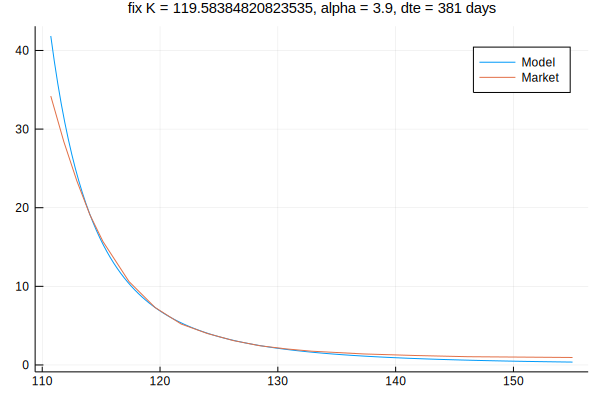

In [57]:
plot(
    [model_strikes, market_strikes],
    [model_prices, market_prices],
    lab = ["Model" "Market"],
    title = "fix K = $K_1, alpha = $α, dte = $dte",
    titlefontsize = 10,
)

Next, we'll plot different combinations for $\alpha$ and `dte`.

In [30]:
Pkg.add("VegaLite");
using VegaLite;

In [62]:
calls_df = DataFrame()
for dte in [Day(73), Day(164), Day(381)]
    for a in range(2.2, 3.0, length=4)
        α = round(a, digits=2)
        subset_calls = filter(x -> x.dte == dte, calls)
        (_volume, idx) = findmax(subset_calls.volume)
        anchor = subset_calls[idx, :]
        C_1 = anchor.ask
        K_1 = anchor.K
        S_0 = 100.0

        price_call = Pricing.call_price_gen(C_1, K_1, S_0, α)
        subset_calls[!, :alpha] .= α
        subset_calls[!, :model_price] = price_call.(subset_calls.K)
        calls_df = vcat(calls_df, subset_calls)
    end
end

rename!(calls_df, :ask => :market_price)
calls_df.dte = map(d -> d.value, calls_df.dte); # Needed for VegaLite

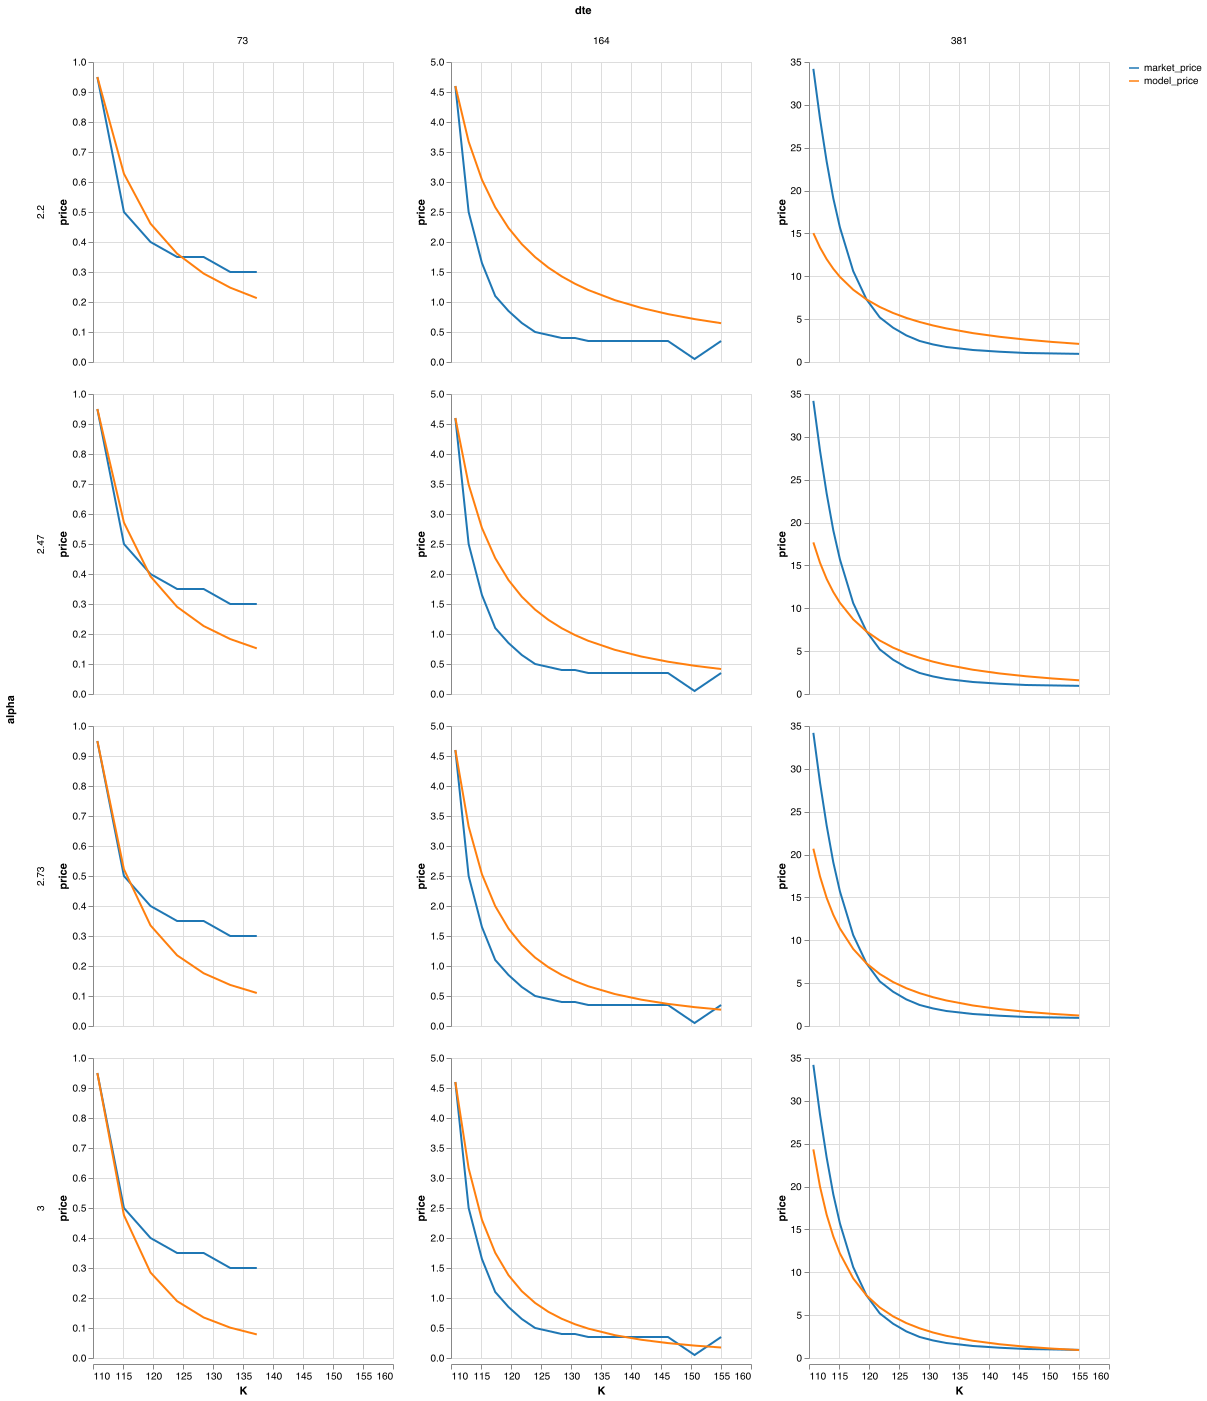

In [65]:
calls_df |> @vlplot(:line, x=:K, y={"value:Q", title="price"},
                    transform=[{fold=[:market_price, :model_price]}],
                    color={"key:O", title="", scale={scheme="category10"}},
                    row={"alpha:O"},
                    column="dte:O",
                    resolve={scale={y="independent"}},
                    width=300,
                    height=300)

# Puts

#### Result 3: Put Pricing

$$P(K_2) = \frac{(-1)^{1-\alpha} S_0^{-\alpha} ((\alpha - 1) K_2 + S_0) - (K_2 - S_0)^{1 - \alpha}}{(-1)^{1-\alpha} S_0^{-\alpha} ((\alpha - 1) K_1 + S_0) - (K_1 - S_0)^{1 - \alpha}} P(K_1)$$

The function *put_price_gen* works the same way as *call_price_gen*.

In [67]:
predictor =  Pricing.put_price_gen(1600.0, 1800.0, 2.0, 3.0)
predictor(1200.0)

1066.9627967023173

In [66]:
# First day's puts (10% otm)
puts = filter(
    x -> (x.underlying == "SPX") & (x.type == "put") &
         (0.9 * x.underlying_last > x.strike),
    df,
) |> x -> first(groupby(x, :quotedate)) |> DataFrame;

In [69]:
puts[!, :K] .= puts.strike ./ puts.underlying_last * 100;

In [70]:
by(puts, :dte, N = :dte => length) |> d -> sort(d, :N, rev=true)

,dte,N
,Day,Int64
1,17 days,167
2,45 days,104
3,717 days,61
4,346 days,60
5,381 days,60
6,255 days,56
7,164 days,54
8,528 days,54
9,73 days,52


In [91]:
puts_df = DataFrame()
for dte in [Day(45), Day(164), Day(346)]
    for a in range(2.2, 3.0, length=4)
        α = round(a, digits=2)
        subset_puts = filter(x -> x.dte == dte, puts)
        (_volume, idx) = findmax(subset_puts.volume)
        anchor = subset_puts[idx, :]
        P_1 = anchor.ask
        K_1 = anchor.K
        S_0 = 100.0

        price_put = Pricing.put_price_gen(P_1, K_1, S_0, α)
        subset_puts[!, :alpha] .= α
        subset_puts[!, :ask] = subset_puts[!, :ask]
        subset_puts[!, :model_price] = price_put.(subset_puts.K)
        puts_df = vcat(puts_df, subset_puts)
    end
end

rename!(puts_df, :ask => :market_price)
puts_df.dte = map(d -> d.value, puts_df.dte); # Needed for VegaLite

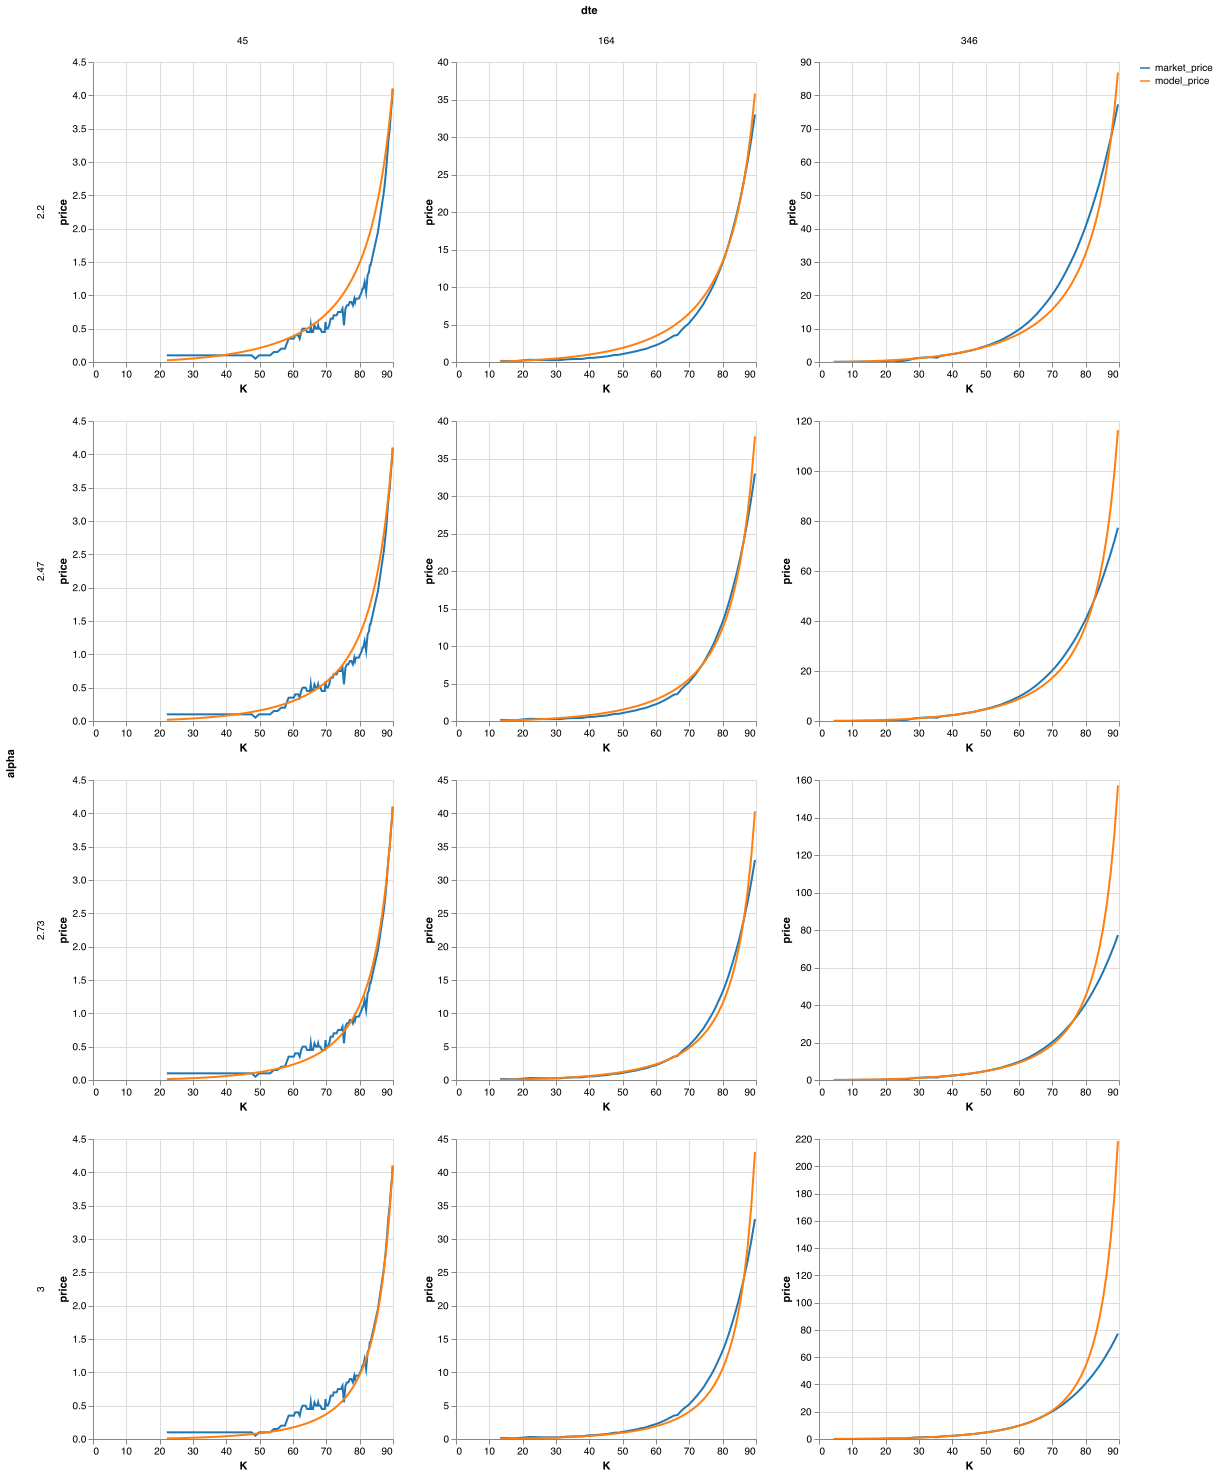

In [93]:
puts_df |> @vlplot(:line, x=:K, y={"value:Q", title="price"},
                    transform=[{fold=[:market_price, :model_price]}],
                    color={"key:O", title="", scale={scheme="category10"}},
                    row={"alpha:O"},
                    column="dte:O",
                    resolve={scale={y="independent"}, axis={x="independent"}},
                    width=300,
                    height=300)